# Loan Default Prediction model:

#### Goal: to determine if a person will default or not , based on historical data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

import os
import io
import requests
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'D:\360digitmg\Datasets\credit_risk_dataset.csv')

# Exploratory Data Analysis:

In [3]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
#here we can see 895 records are empty for person_emp_length and about 3116 are null for loan_int_rate
#we will impute the nulls
# fill NaN with the mode
df['person_emp_length'].fillna(df['person_emp_length'].mode()[0], inplace=True)

df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [5]:
df.isnull().sum()
#thus we have imputed the null values

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


<AxesSubplot:>

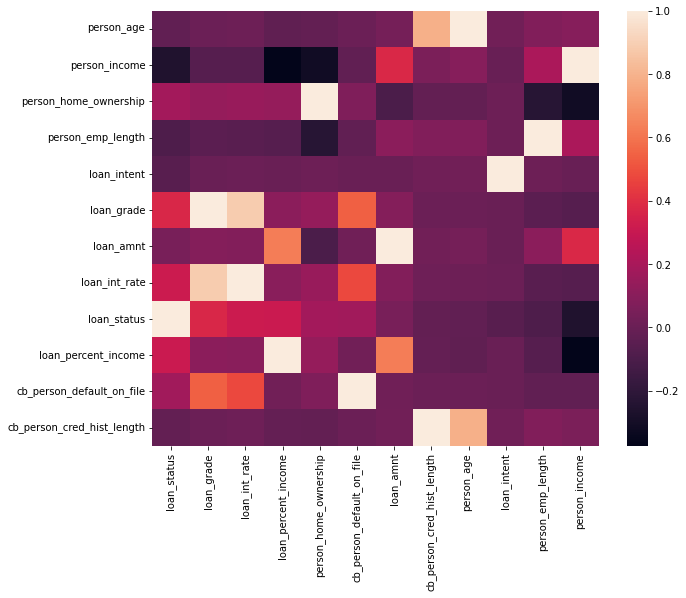

In [54]:
corr=df.corr().sort_values('loan_status',axis=1,ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(corr)

We Observe the Following:
1)person_income, person_emp_length, and person_age: has negetive correlation withloan_status being default, which means the larger these variebles, the less likely the person is risky.
2)Also,loan_percent_income, loan_int_rate, and loan_amnt: has postive correlation on loan_status being default, which means the larger these variebles, the more likely the person may be a  defaulter.

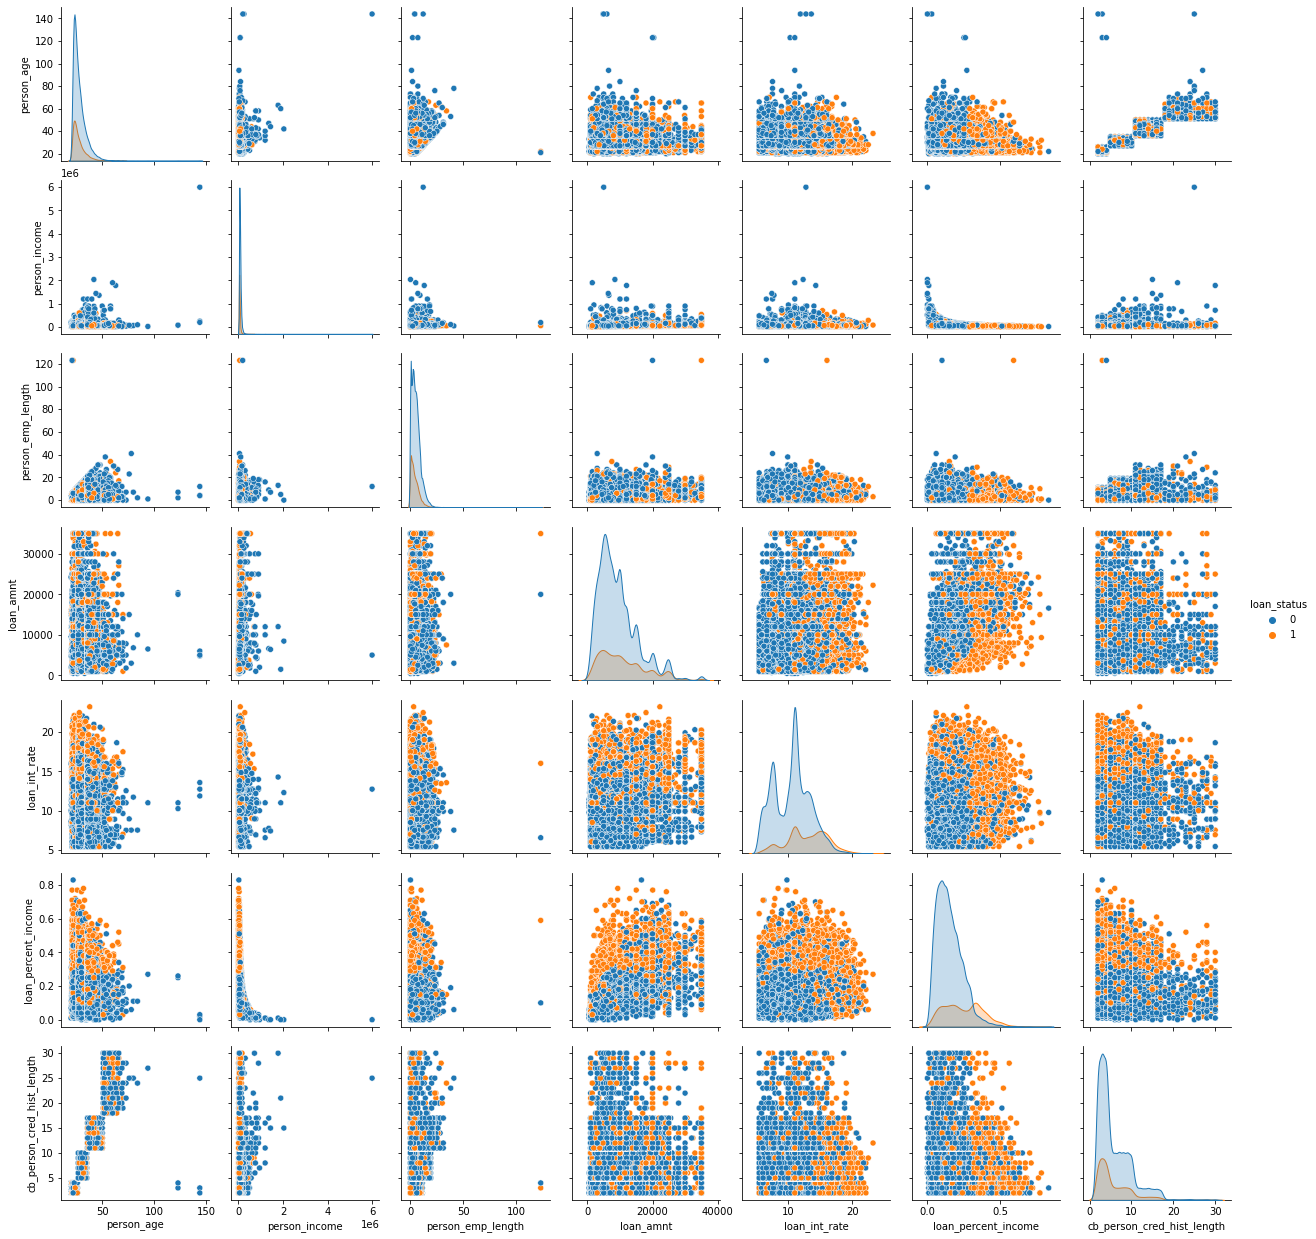

In [10]:
sns.pairplot(df,hue='loan_status')
plt.show()

Text(0.5, 1.0, 'number_of_people_by_loan_status')

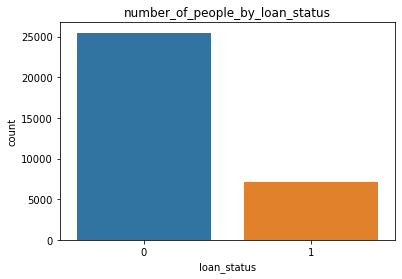

In [11]:
sns.countplot(df['loan_status'])
plt.title('number_of_people_by_loan_status')
#0 implies they have returned the amount, and maximum population seems to have returned it , while about   

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Text(0.5, 1.0, 'home ownership type')

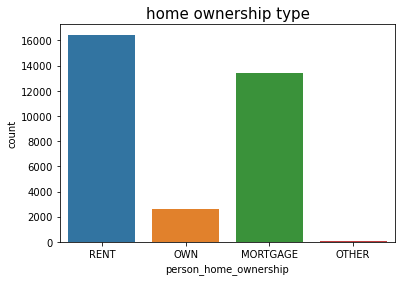

In [12]:
sns.countplot(df['person_home_ownership'])
plt.title('home ownership type',fontsize=15)

Text(0.5, 1.0, 'Reason of Loan')

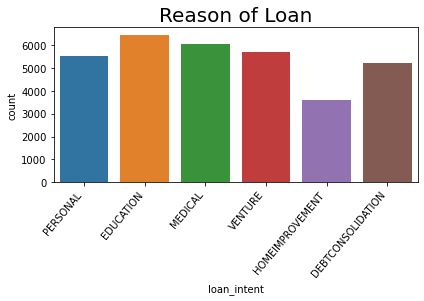

In [13]:
p1=sns.countplot(df['loan_intent'])
p1.set_xticklabels(p1.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.title('Reason of Loan',fontsize=20)
#maximum loan holders seems to be students , who have applied for the loan as Education Loan 

In [ ]:
#the next type consists of loan for medical expenses, personal and so on...

Text(0.5, 1.0, 'Loan Grade Type')

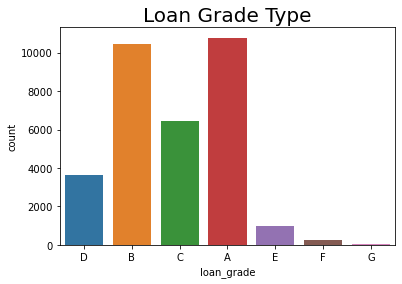

In [14]:
#let us visualize the no of loan holders by loan grade type:
sns.countplot(df['loan_grade'])
plt.title('Loan Grade Type',fontsize=20)

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

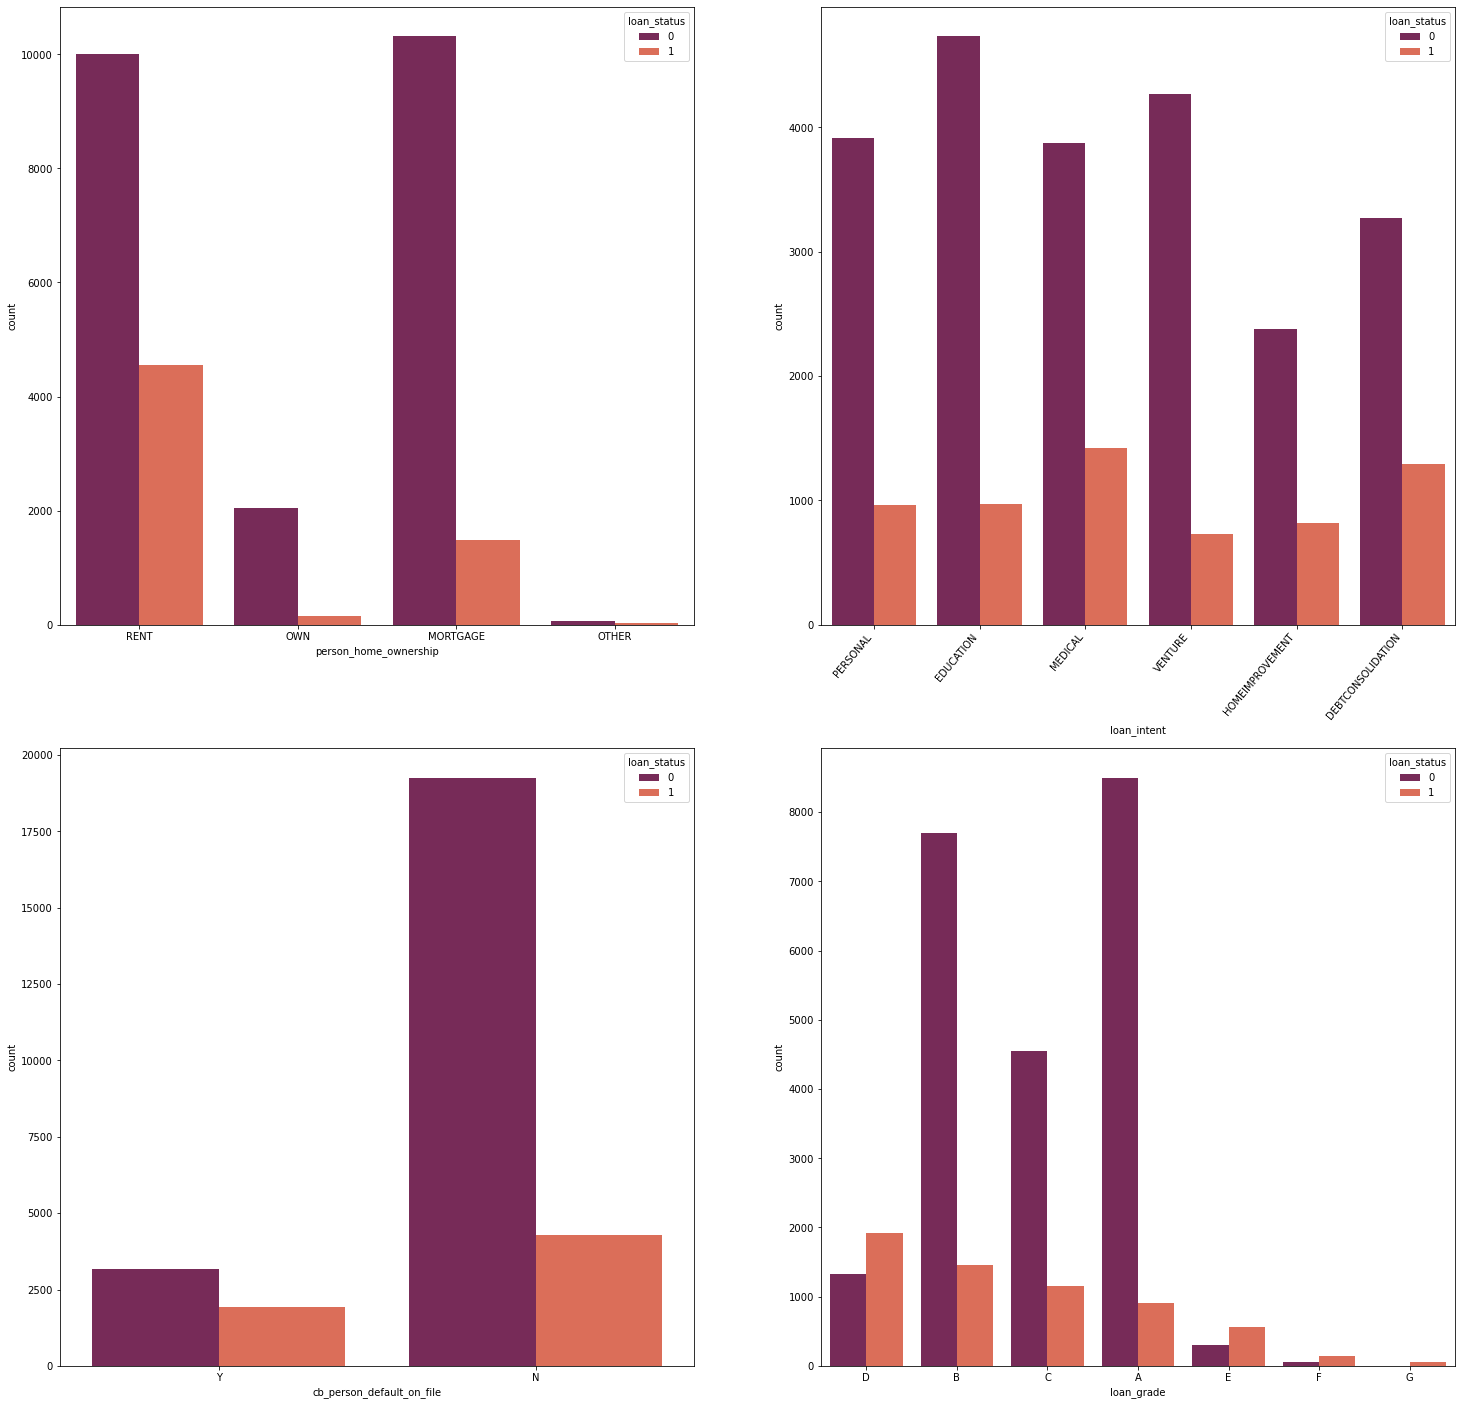

In [65]:
# countplot for various loan holders according to type and loan_status:
fig,axes = plt.subplots(2,2, figsize=(25,25))

sns.countplot('person_home_ownership',hue="loan_status",data=df,ax=axes[0,0],palette='rocket')
p2=sns.countplot('loan_intent',hue="loan_status",data=df,ax=axes[0,1],palette='rocket')
p2.set_xticklabels(p2.get_xticklabels(), rotation=50, ha="right")

sns.countplot('loan_grade',hue="loan_status",data=df,ax=axes[1,1],palette='rocket')
sns.countplot('cb_person_default_on_file',hue="loan_status",data=df,ax=axes[1,0],palette='rocket')

person_age                       AxesSubplot(0.125,0.125;0.0824468x0.755)
person_income                 AxesSubplot(0.223936,0.125;0.0824468x0.755)
person_emp_length             AxesSubplot(0.322872,0.125;0.0824468x0.755)
loan_amnt                     AxesSubplot(0.421809,0.125;0.0824468x0.755)
loan_int_rate                 AxesSubplot(0.520745,0.125;0.0824468x0.755)
loan_status                   AxesSubplot(0.619681,0.125;0.0824468x0.755)
loan_percent_income           AxesSubplot(0.718617,0.125;0.0824468x0.755)
cb_person_cred_hist_length    AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

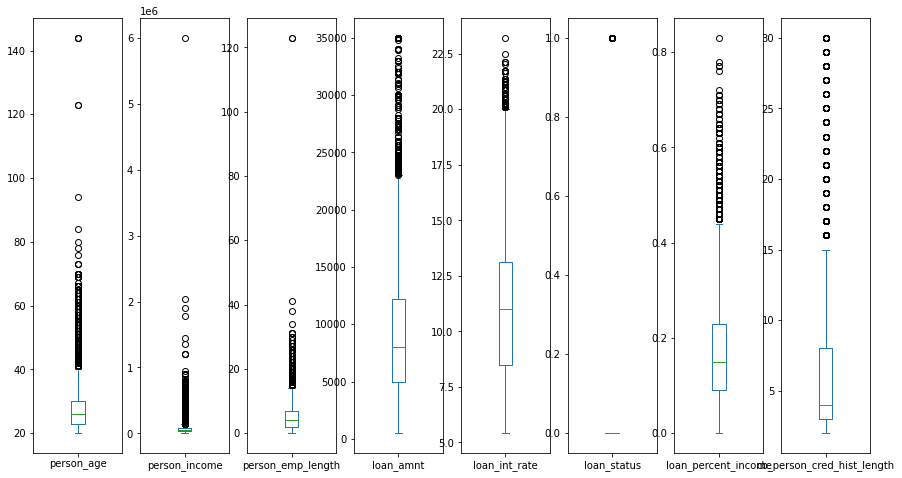

In [15]:
df.plot(kind='box',subplots=True,sharex=False,sharey=False,figsize=(15,8))

In [11]:
#Seperating the numerical and the categorical columns:

df_num=df.select_dtypes(include='number')
df_num=df_num.drop(['loan_status'],axis=1)
df_cat=df.select_dtypes(include=['object','category'])



<Figure size 432x288 with 0 Axes>

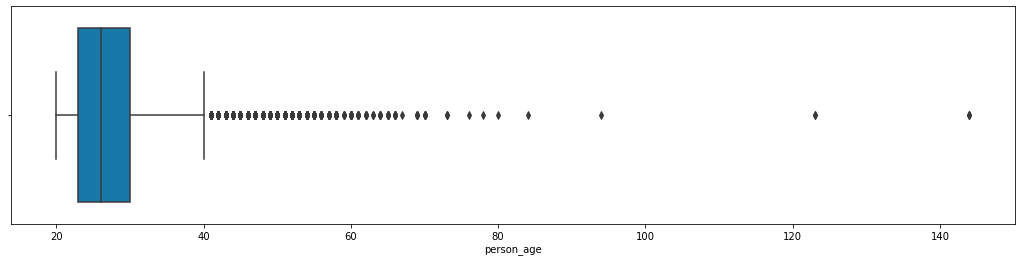

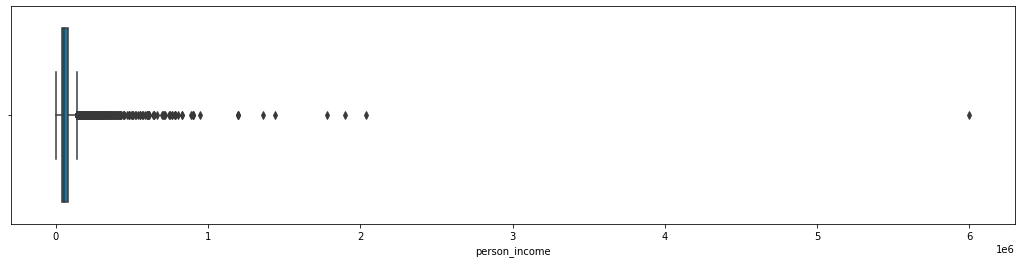

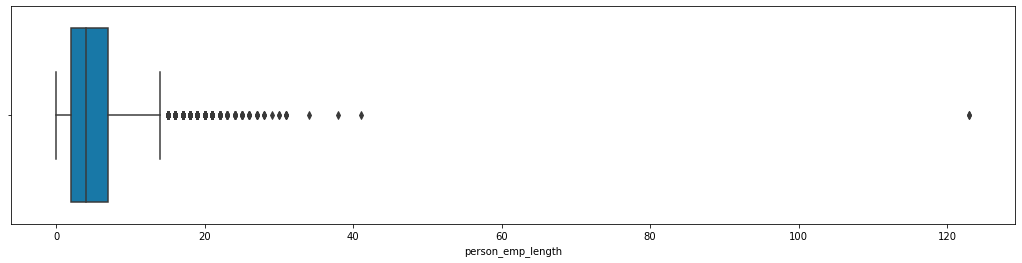

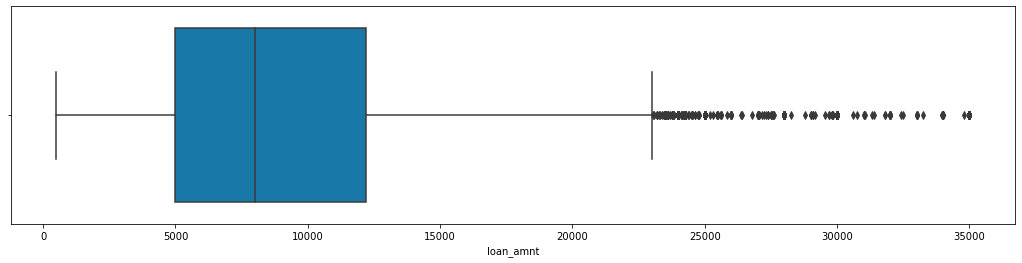

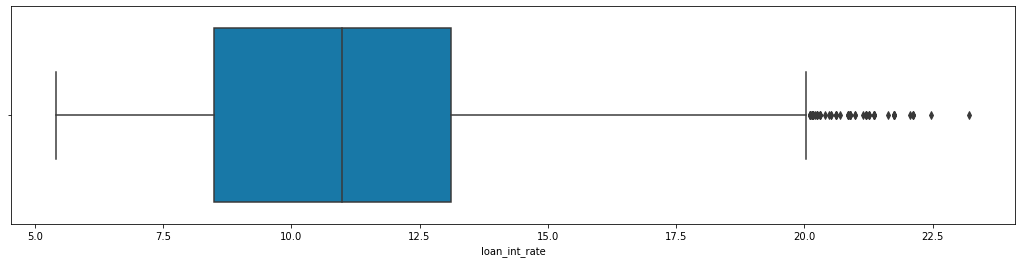

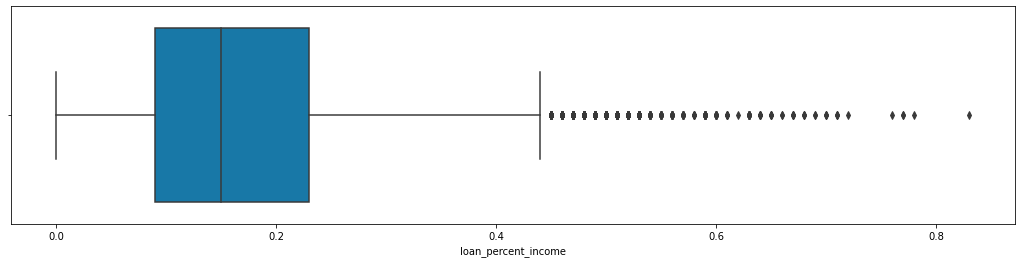

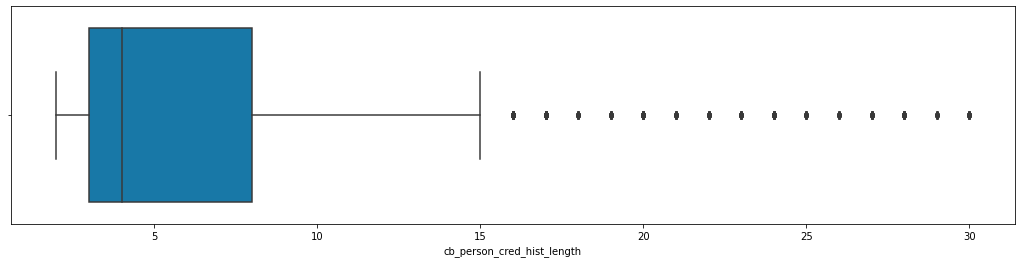

In [13]:
#checking the outliers in the numerical columns:
for i,cols in enumerate(df_num.columns):
    plt.figure(i)
    plt.figure(figsize=(18,4))
    sns.boxplot(df_num[cols],palette='winter')

In [14]:
#removing the outliers, using the IOR method:
df_num.shape

(32581, 7)

In [12]:
cols=df_num.columns
cols
    
for i in cols:
    IQR = round(df_num[i].quantile(0.75) - df_num[i].quantile(0.25), 1)
    upper_limit = round(df_num[i].quantile(0.75) +(1.5 * IQR),1)
    df = df.loc[(df[i].isnull()) | (df[i] <=upper_limit)]
    df_num = df_num.loc[(df_num[i].isnull()) | (df_num[i] <=upper_limit)]





<Figure size 432x288 with 0 Axes>

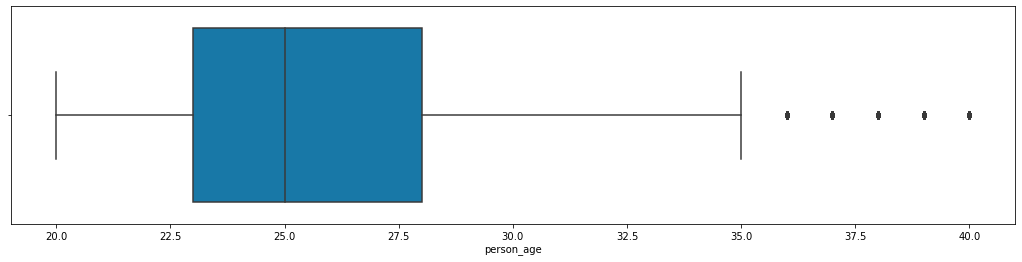

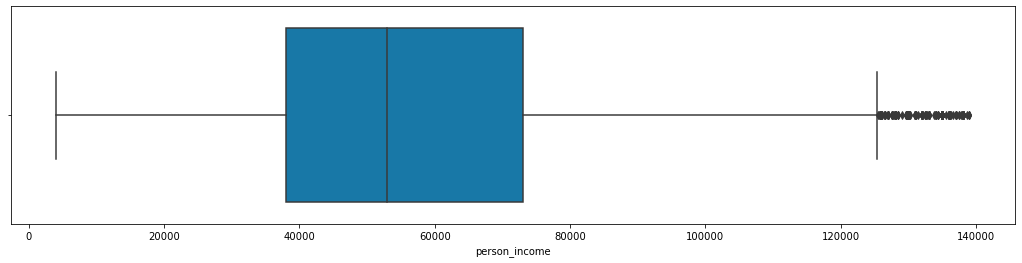

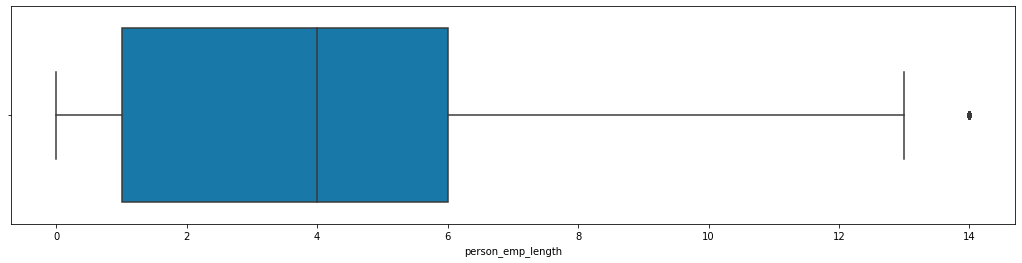

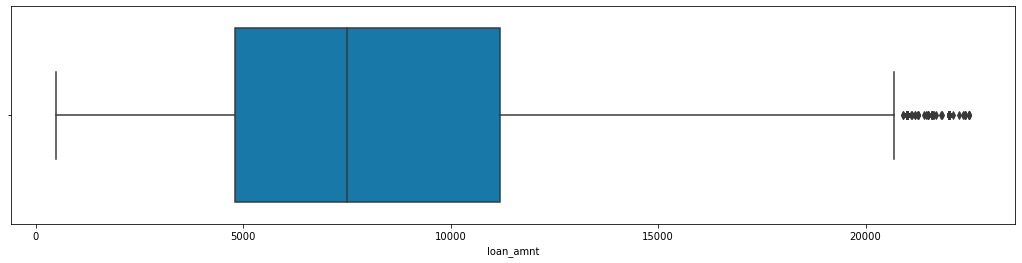

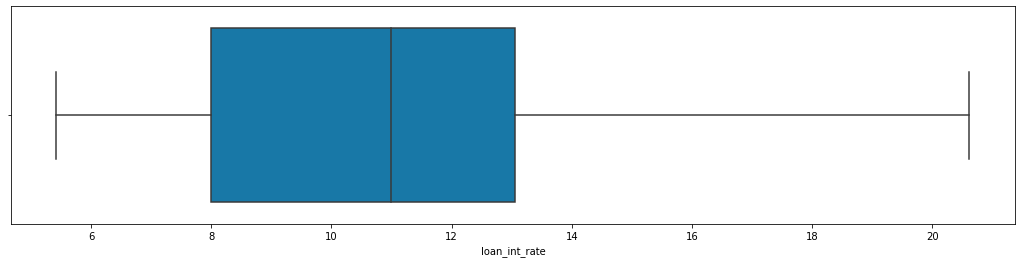

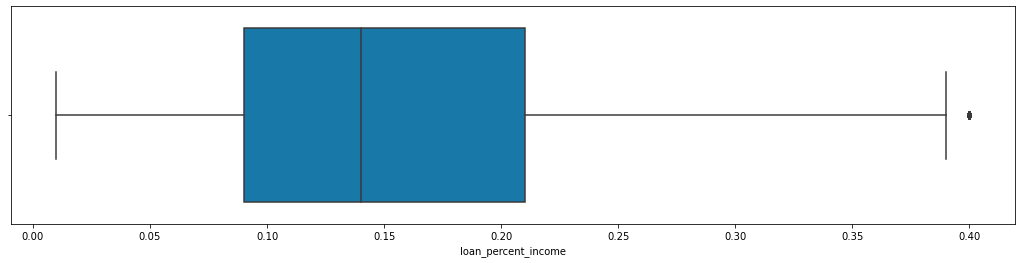

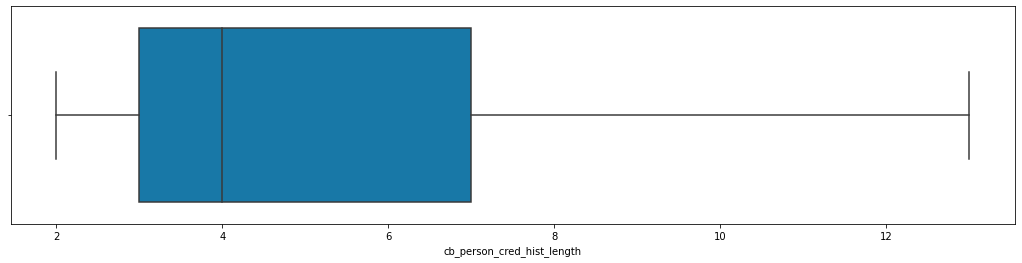

In [16]:
for i,cols in enumerate(df_num.columns):
    plt.figure(i)
    plt.figure(figsize=(18,4))
    sns.boxplot(df_num[cols],palette='winter')

In [10]:
df_num.shape

(32581, 7)

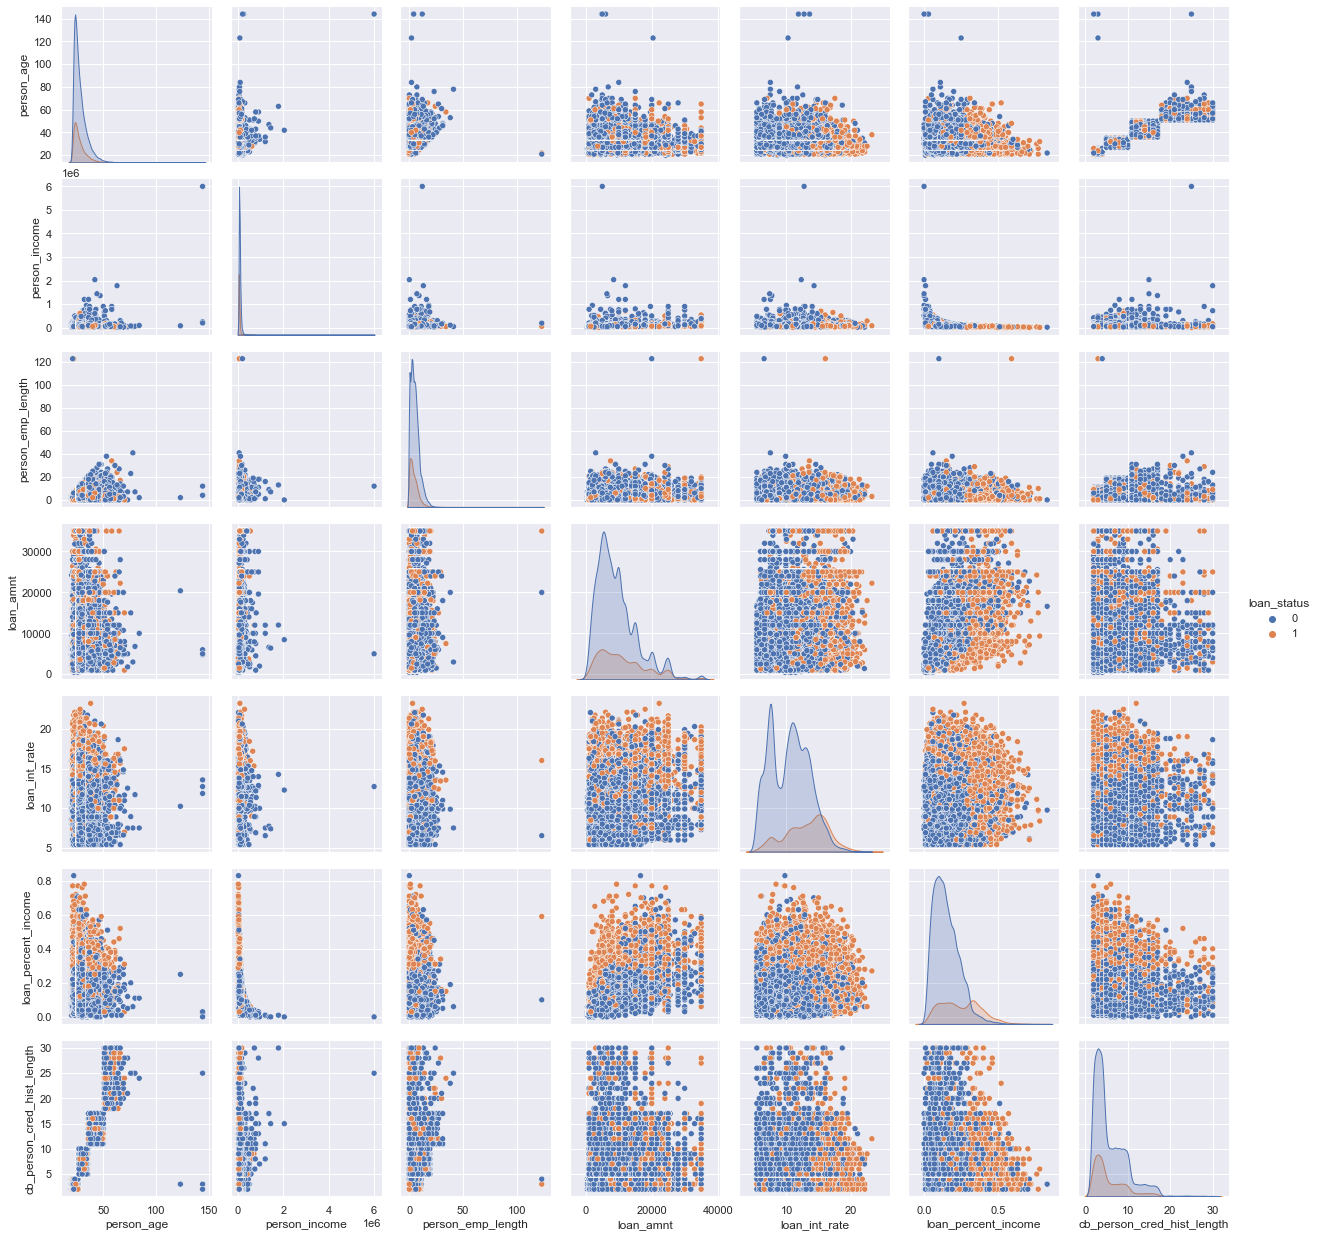

In [183]:
#again inspecting the pairplot
sns.pairplot(df,hue='loan_status')
plt.show()

In [13]:
#Label Edcoding the categorical columns:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

col_cat=df_cat.columns
for i in col_cat:
    df[i]=le.fit_transform(df[i])
    

In [14]:
#splittimg the target and the predictors:
coln=df.columns
target=coln[8]
predictors=coln[[0,1,2,3,4,5,6,7,9,10,11]]


# Modeling


## 1)DecisionTree

In [18]:
from sklearn.model_selection import train_test_split
#DecisionTree
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc_list=[]
for i in range(0,20):
    train, test = train_test_split(df, test_size = 0.2,random_state=i)
    model = DT(criterion = 'entropy')
    model.fit(train[predictors], train[target])
    pred1 = model.predict(test[predictors])
    acc=np.mean(pred1 == test[target])
    acc_list.append(acc)
print(acc_list)
print(acc_list.index(max(acc_list)))#the random state with the maximum accuracy:7

[0.8883346124328473, 0.8904451266308518, 0.8768227168073676, 0.8844973138910207, 0.8879508825786646, 0.8900613967766692, 0.8898695318495778, 0.8821949347659248, 0.8898695318495778, 0.885264773599386, 0.8891020721412126, 0.8919800460475825, 0.8854566385264774, 0.886415963161934, 0.8912125863392172, 0.8879508825786646, 0.8844973138910207, 0.8833461243284727, 0.8850729086722947, 0.8873752877973906]
11


In [19]:
train, test = train_test_split(df, test_size = 0.2,random_state=8)
model = DT(criterion = 'entropy')

model.fit(train[predictors], train[target])
pred1 = model.predict(test[predictors])


np.mean(pred1 == test[target])


0.8902532617037605

In [20]:
pd.crosstab(test[target], pred1, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,0,1
Actual,,
0,3874,295
1,277,766


In [21]:
# Prediction on Train df
pred2 = model.predict(train[predictors])
pd.crosstab(train[target], pred2, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,0,1
Actual,,
0,16664,0
1,0,4180


In [22]:
 np.mean(pred2 == train[target]) # Train df Accuracy


1.0

In [51]:
#seems like our model is Overfitting here ,
#so we might have to resolve this by GridsearchCV:

In [52]:
# we will use GridsearchCV and RandomsearchCV for best 
#parameters and also to reduce overfitting

In [23]:
from sklearn.model_selection import GridSearchCV

model = DT(criterion = 'entropy')

param_grid = {'min_samples_leaf': [1, 5, 10, 20],'max_depth': [2, 4, 6, 8, 10],'max_features': ['sqrt']}


grid_search = GridSearchCV(estimator = model, param_grid = param_grid,  scoring = 'accuracy', n_jobs = -1, cv = 5, refit=True, return_train_score=True)

grid_search.fit(train[predictors], train[target])

#the best Parameters after GridsearchCV:
print(grid_search.best_params_)

#Best Parameters Model:
cv_dt_clf_grid = grid_search.best_estimator_

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1}


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

#Evaluting testing Dataframe

print(confusion_matrix(test[target], cv_dt_clf_grid.predict(test[predictors])))
accuracy_score(test[target], cv_dt_clf_grid.predict(test[predictors]))

[[4074   95]
 [ 399  644]]


0.9052187260168841

In [55]:
# Evaluation on Training df
print(confusion_matrix(train[target], cv_dt_clf_grid.predict(train[predictors])))
accuracy_score(train[target], cv_dt_clf_grid.predict(train[predictors]))

[[16452   212]
 [ 1593  2587]]


0.9134043369794665

In [29]:
# predict
y_true = test[target]
y_pred = pred_random
print('RF_model: recall:', recall_score(y_true, y_pred))
print('RF_model: precision:',precision_score(y_true, y_pred))
print('RF_model: F1 Score:', f1_score(y_true, y_pred))
print('RF_model: accuracy:', accuracy_score(y_true, y_pred))

RF_model: recall: 0.6011505273250239
RF_model: precision: 0.8260869565217391
RF_model: F1 Score: 0.6958934517203108
RF_model: accuracy: 0.8948580199539524


In [30]:
from sklearn.model_selection import RandomizedSearchCV

model = DT(criterion = 'entropy')

param_dist = {'min_samples_leaf': list(range(1, 50)),'max_depth': list(range(2, 20)),'max_features': ['sqrt']}
#number of iterations:
n_iter = 50

model_random_search = RandomizedSearchCV(estimator = model, param_distributions = param_dist,n_iter = n_iter)

model_random_search.fit(train[predictors], train[target])

print(model_random_search.best_params_)

dT_random = model_random_search.best_estimator_

{'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 13}


In [31]:
#prediciton on test df 
pred_random = dT_random.predict(test[predictors])
pd.crosstab(test[target], pred_random, rownames=['Actual'], colnames=['Predictions'])

np.mean(pred_random == test[target])

0.9056024558710668

In [32]:
#predicition on train df 
pred1_random = dT_random.predict(train[predictors])
print(pd.crosstab(train[target], pred1_random, rownames = ['Actual'], colnames = ['Predictions']))

np.mean(pred1_random == train[target])

Predictions      0     1
Actual                  
0            16330   334
1             1421  2759


0.9158031088082902

In [33]:
# predict
y_true = test[target]
y_pred = pred_random
print('DT_model: recall:', recall_score(y_true, y_pred))
print('DT_model: precision:',precision_score(y_true, y_pred))
print('DT_model: F1 Score:', f1_score(y_true, y_pred))
print('DT_model: accuracy:', accuracy_score(y_true, y_pred))

DT_model: recall: 0.6279961649089166
DT_model: precision: 0.8629776021080369
DT_model: F1 Score: 0.7269700332963375
DT_model: accuracy: 0.9056024558710668


## 2) Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

rf_model = RandomForestClassifier()

rf_model.fit(train[predictors], train[target])
pred3 = rf_model.predict(test[predictors])


np.mean(pred3 == test[target])

0.9322716807367614

In [35]:
param_dist = {'min_samples_leaf': list(range(1, 50)),'max_depth': list(range(2, 20)),'max_features': ['sqrt']}
#number of iterations:
n_iter = 50

rf_model_random_search = RandomizedSearchCV(estimator = rf_model, param_distributions = param_dist,n_iter = n_iter)

rf_model_random_search.fit(train[predictors], train[target])

print(rf_model_random_search.best_params_)

rf_random = rf_model_random_search.best_estimator_

{'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 16}


In [36]:
#prediciton on test df 
rf_pred_random = rf_random.predict(test[predictors])
print(pd.crosstab(test[target], rf_pred_random, rownames=['Actual'], colnames=['Predictions']))

np.mean(rf_pred_random == test[target])

Predictions     0    1
Actual                
0            4145   24
1             349  694


0.9284343821949348

In [37]:
#predicition on train df 
rf1_pred_random = rf_random.predict(train[predictors])
print(pd.crosstab(train[target], rf1_pred_random, rownames=['Actual'], colnames=['Predictions']))

np.mean(rf1_pred_random == train[target])

Predictions      0     1
Actual                  
0            16619    45
1             1414  2766


0.9300038380349261

In [38]:
# predict
y_true = test[target]
y_pred = rf_pred_random
print('RF_model: recall:', recall_score(y_true, y_pred))
print('RF_model: precision:',precision_score(y_true, y_pred))
print('RF_model: F1 Score:', f1_score(y_true, y_pred))
print('RF_model: accuracy:', accuracy_score(y_true, y_pred))

RF_model: recall: 0.6653883029721956
RF_model: precision: 0.9665738161559888
RF_model: F1 Score: 0.7881885292447474
RF_model: accuracy: 0.9284343821949348


##### Precision increased by 7% 
##### Accuracy By 2%
##### Recall Increased by 4% and
##### F1 score by 5%  


## 3)XGBoost

In [39]:
from xgboost import XGBClassifier

xg_model=XGBClassifier(learning_rate = 0.05)


xg_model.fit(train[predictors], train[target])
pred4 = xg_model.predict(test[predictors])


np.mean(pred4 == test[target])


0.9364927091327705

In [40]:
param_grid = {
    "xg_model__learning_rate": np.arange(0.01,0.3,0.08),
    "xg_model__max_depth":np.arange(1,10,1)
}

xg_model_grid = GridSearchCV(estimator=xg_model,param_grid = param_grid ,scoring = "accuracy")

xg_model_grid.fit(train[predictors],train[target])

[17:28:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:28:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:29:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:29:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:29:01] WARNING: C:/buildkite-agent/builds/buildkite-

[17:29:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:29:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:29:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:29:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:29:24] WARNING: C:/buildkite-agent/builds/buildkite-

[17:29:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:29:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:29:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:29:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:29:52] WARNING: C:/buildkite-agent/builds/buildkite-

[17:30:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:30:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:30:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:30:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:30:22] WARNING: C:/buildkite-agent/builds/buildkite-

[17:30:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:30:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:30:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:30:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:30:59] WARNING: C:/buildkite-agent/builds/buildkite-

[17:31:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:31:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:31:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:31:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.

[17:31:41] WARNING: C:/buildkite-agent/builds/buildkite-

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.05, max_bin=256,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
   

In [41]:
print(xg_model_grid.best_params_)

xg_grid= xg_model_grid.best_estimator_

{'xg_model__learning_rate': 0.01, 'xg_model__max_depth': 1}


In [42]:
xg_grid.fit(train[predictors], train[target])
pred5 = xg_grid.predict(test[predictors])


np.mean(pred5 == test[target])


[17:34:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xg_model__learning_rate", "xg_model__max_depth" } are not used.



0.9364927091327705

In [43]:
# predict
y_true = test[target]
y_pred = pred5
print('xg_model: recall:', recall_score(y_true, y_pred))
print('xg_model: precision:',precision_score(y_true, y_pred))
print('xg_model: F1 Score:', f1_score(y_true, y_pred))
print('xg_model: accuracy:', accuracy_score(y_true, y_pred))

xg_model: recall: 0.6970278044103547
xg_model: precision: 0.9797843665768194
xg_model: F1 Score: 0.8145658263305322
xg_model: accuracy: 0.9364927091327705
